# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

## 1. Odczyt obrazka

In [2]:
if not os.path.exists("100zloty.jpg"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg

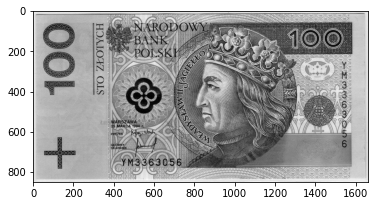

In [3]:
image = cv2.imread('100zloty.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.gray()
plt.imshow(image)
plt.show()

## 2. Podział na 8 obrazów

Do otrzymania obrazów utworzonych z wartości na poszczególnych bitach, wykorzystałem operator iloczynu logicznego z maskami bitowymi, posiadającymi dokładnie jedną jedynkę, czyli kolejnymi potęgami dwójki.

bity numeruję w sposób: 0-najmłodszy, 7-najstarszy

In [4]:
bit_images = []

for i in range(8):
    bit_images.append((image & 2**i).astype('bool'))

bit #0


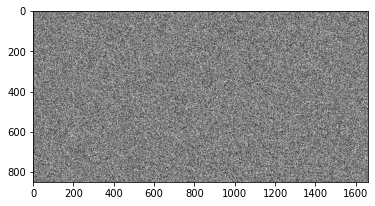

bit #1


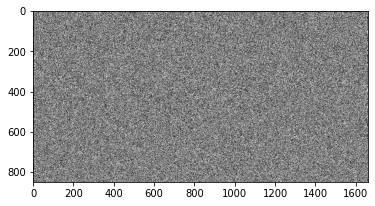

bit #2


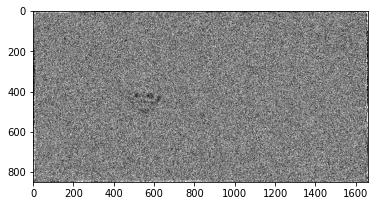

bit #3


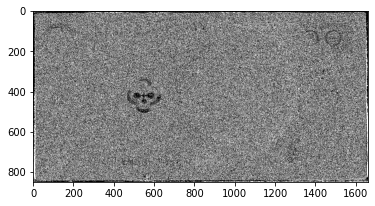

bit #4


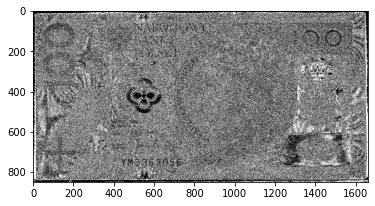

bit #5


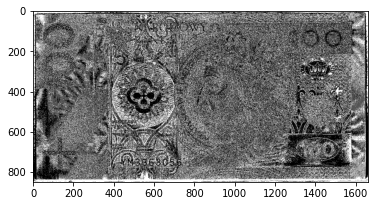

bit #6


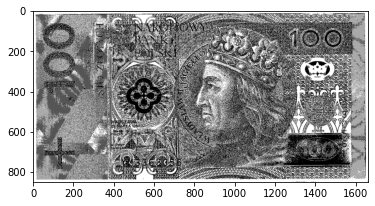

bit #7


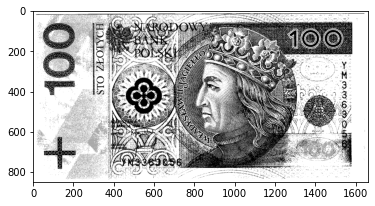

In [5]:
for i in range(8):
    print(f'bit #{i}')
    plt.imshow(bit_images[i])
    plt.show()

Możemy zauważyć, że bardziej znacząca informacja o wyglądzie obrazka zawarta jest w bitach starszych. Jednak analizując warstwy utworzone z bitów niższych możemy łatwiej wychwycić niektóre ukryte symbole, takie jak np. prostokąt z napisem '100' w prawym dolnym rogu.

## 3. Odtworzenie obrazku

* iteracyjne dodawanie obrazów bitowych, od najstarszego do najmłodszego

bits 7:7


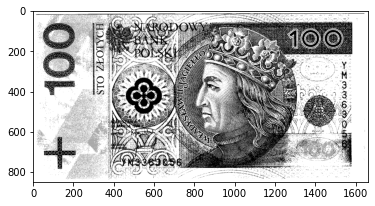

bits 6:7


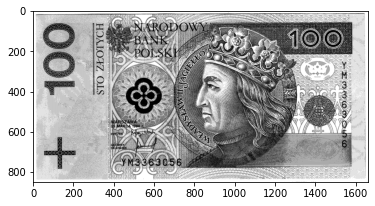

bits 5:7


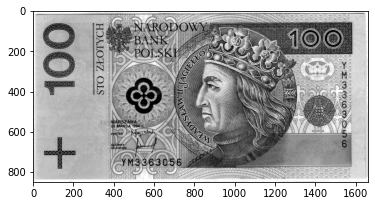

bits 4:7


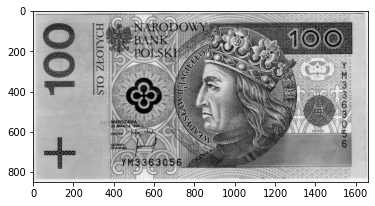

bits 3:7


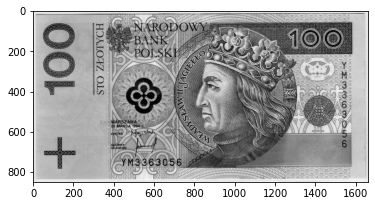

bits 2:7


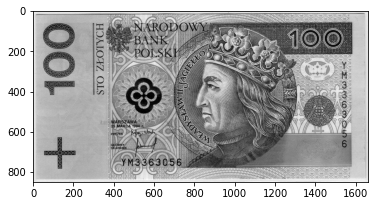

bits 1:7


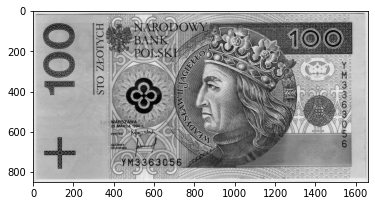

bits 0:7


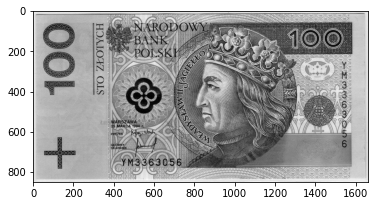

In [6]:
reconstructed = np.zeros(image.shape)

for i in range(7, -1, -1):
    reconstructed *= 2
    reconstructed += bit_images[i]

    print(f'bits {i}:7')
    plt.imshow(reconstructed)
    plt.show()


* rekonstrukcja w zadanej kolejności

In [7]:
def reconstruct(indices):
    reconstructed = np.zeros(image.shape)

    for i, idx in enumerate(indices):
        reconstructed += bit_images[idx] * 2**idx

        print(f'bits {indices[:i+1]}')
        plt.imshow(reconstructed)
        plt.show()

od najmłodszego bitu do najstarszego:

bits [0]


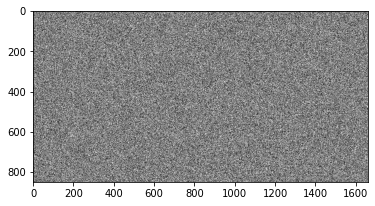

bits [0, 1]


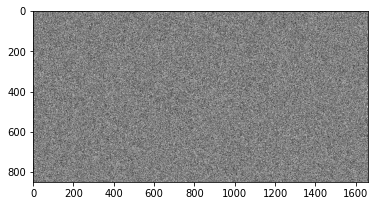

bits [0, 1, 2]


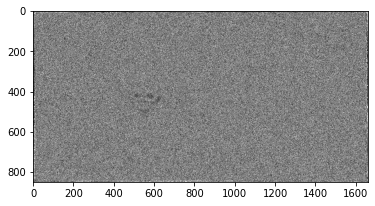

bits [0, 1, 2, 3]


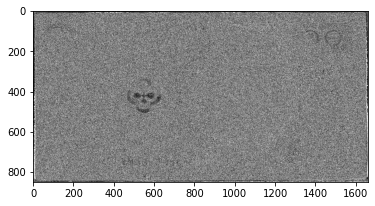

bits [0, 1, 2, 3, 4]


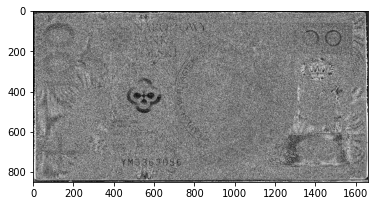

bits [0, 1, 2, 3, 4, 5]


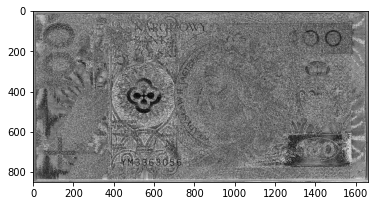

bits [0, 1, 2, 3, 4, 5, 6]


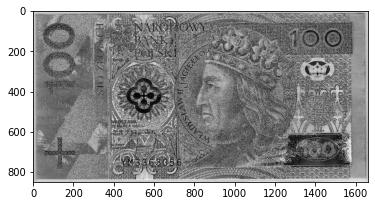

bits [0, 1, 2, 3, 4, 5, 6, 7]


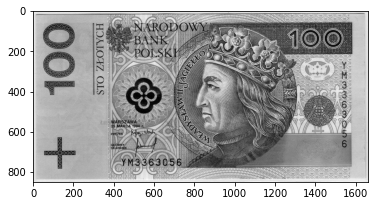

In [8]:
reconstruct(list(range(8)))

wybrana kolejność dodawanych bitów:

bits [2]


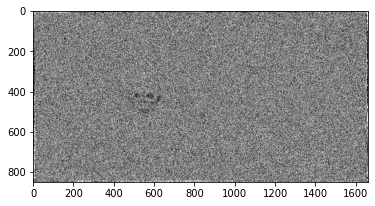

bits [2, 4]


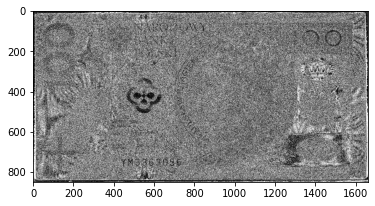

bits [2, 4, 6]


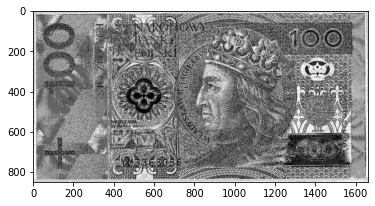

bits [2, 4, 6, 1]


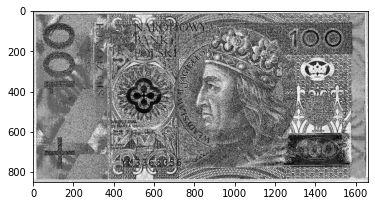

bits [2, 4, 6, 1, 3]


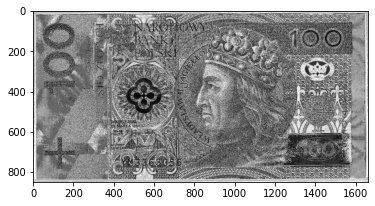

bits [2, 4, 6, 1, 3, 5]


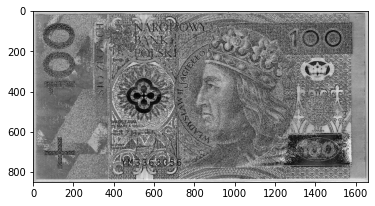

bits [2, 4, 6, 1, 3, 5, 7]


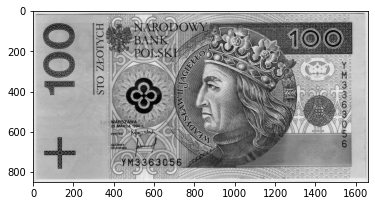

In [9]:
reconstruct([2, 4, 6, 1, 3, 5, 7])

M. Hawryluk, 2021